In [3]:
import numpy as np
#numpy for operating on the data
import pandas as pd
#pandas for organizing the data
import matplotlib.pyplot as plt
#matplotlib for visualizing the data
df=pd.read_csv('pogoda_pv.csv')
df.head(2880)

,timestamp,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,uv_radiation,pm2.5,pv_voltage,pv_current,battery_voltage,battery_current,Unnamed: 14
0,21-05-2021T16:21:01,21.244,3.894,322,33.985,985.535,34382.801,198.0,10.22,1.7,73.77,2.4,47.73,3.6,NaN
1,21-05-2021T16:22:01,21.188,2.121,269,33.986,985.603,34601.801,199.2,10.29,1.0,79.49,2.2,47.73,3.6,NaN
2,21-05-2021T16:23:01,21.160,6.357,262,33.801,985.447,35530.898,204.6,10.57,1.0,79.03,2.3,50.65,3.5,NaN
3,21-05-2021T16:24:01,21.045,2.433,292,34.229,985.547,36529.301,210.3,10.93,1.0,76.62,2.5,51.13,3.7,NaN
4,21-05-2021T16:25:02,21.070,1.773,140,34.945,985.585,38342.199,220.9,11.46,0.6,74.97,2.6,51.47,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,23-05-2021T17:04:02,11.983,2.817,279,82.393,990.570,8874.500,51.1,2.23,2.7,81.10,0.4,54.82,0.5,NaN
2876,23-05-2021T17:05:01,11.940,1.997,259,82.829,990.619,8683.000,50.0,2.16,3.0,83.67,0.3,54.83,0.4,NaN
2877,23-05-2021T17:06:01,11.903,1.406,245,83.955,990.639,8597.500,49.5,2.13,3.2,84.49,0.3,54.77,0.4,NaN
2878,23-05-2021T17:07:01,11.898,0.776,272,83.739,990.660,8668.800,49.9,2.16,5.9,84.62,0.3,54.82,0.4,NaN


In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.drop('Unnamed: 14', axis= 1, inplace=True)
df['Power'] = df['pv_voltage'] * df['pv_current'] 
df.drop(df[df['battery_voltage'] > 54 ].index, inplace = True)
#df.drop(['pv_voltage','pv_current', 'battery_voltage', 'battery_current'], axis = 1, inplace = True)

In [5]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106596 entries, 0 to 129932
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   timestamp        106596 non-null  datetime64[ns]
 1   temperature      106596 non-null  float64       
 2   wind_speed       106596 non-null  float64       
 3   wind_dir         106596 non-null  int64         
 4   humidity         106596 non-null  float64       
 5   air_pressure     106596 non-null  float64       
 6   luminance        106596 non-null  float64       
 7   solar_radiation  106596 non-null  float64       
 8   uv_radiation     106596 non-null  float64       
 9   pm2.5            106596 non-null  float64       
 10  pv_voltage       106596 non-null  float64       
 11  pv_current       106596 non-null  float64       
 12  battery_voltage  106596 non-null  float64       
 13  battery_current  106596 non-null  float64       
 14  Power            106

,timestamp,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,uv_radiation,pm2.5,pv_voltage,pv_current,battery_voltage,battery_current,Power
0,2021-05-21 16:21:01,21.244,3.894,322,33.985,985.535,34382.801,198.0,10.22,1.7,73.77,2.4,47.73,3.6,177.048
1,2021-05-21 16:22:01,21.188,2.121,269,33.986,985.603,34601.801,199.2,10.29,1.0,79.49,2.2,47.73,3.6,174.878
2,2021-05-21 16:23:01,21.160,6.357,262,33.801,985.447,35530.898,204.6,10.57,1.0,79.03,2.3,50.65,3.5,181.769
3,2021-05-21 16:24:01,21.045,2.433,292,34.229,985.547,36529.301,210.3,10.93,1.0,76.62,2.5,51.13,3.7,191.550
4,2021-05-21 16:25:02,21.070,1.773,140,34.945,985.585,38342.199,220.9,11.46,0.6,74.97,2.6,51.47,3.9,194.922


In [6]:
df.corr()

,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,uv_radiation,pm2.5,pv_voltage,pv_current,battery_voltage,battery_current,Power
temperature,1.000000,0.252003,-0.169952,-0.634056,-0.246321,0.538500,0.538497,0.505543,-0.077664,0.330017,0.547269,0.052248,0.539549,0.537625
wind_speed,0.252003,1.000000,-0.116107,-0.308004,-0.058270,0.303707,0.303683,0.290003,-0.331218,0.268810,0.341161,0.033893,0.346688,0.345827
wind_dir,-0.169952,-0.116107,1.000000,0.106563,-0.030669,-0.062543,-0.062547,-0.057294,-0.010893,-0.053864,-0.059278,0.003008,-0.057556,-0.057095
humidity,-0.634056,-0.308004,0.106563,1.000000,-0.100391,-0.622454,-0.622440,-0.608500,0.509517,-0.422932,-0.650058,-0.126927,-0.654405,-0.655001
air_pressure,-0.246321,-0.058270,-0.030669,-0.100391,1.000000,0.052660,0.052670,0.059135,-0.057111,-0.007769,0.033061,0.180064,0.034175,0.040039
luminance,0.538500,0.303707,-0.062543,-0.622454,0.052660,1.000000,0.999991,0.931141,-0.256478,0.518303,0.960374,0.198350,0.960190,0.962826
solar_radiation,0.538497,0.303683,-0.062547,-0.622440,0.052670,0.999991,1.000000,0.931147,-0.256463,0.518226,0.960364,0.198359,0.960185,0.962817
uv_radiation,0.505543,0.290003,-0.057294,-0.608500,0.059135,0.931141,0.931147,1.000000,-0.252264,0.536445,0.904516,0.201477,0.906317,0.909668
pm2.5,-0.077664,-0.331218,-0.010893,0.509517,-0.057111,-0.256478,-0.256463,-0.252264,1.000000,-0.232379,-0.312542,-0.067454,-0.320864,-0.322155
pv_voltage,0.330017,0.268810,-0.053864,-0.422932,-0.007769,0.518303,0.518226,0.536445,-0.232379,1.000000,0.497202,0.186291,0.510443,0.518262


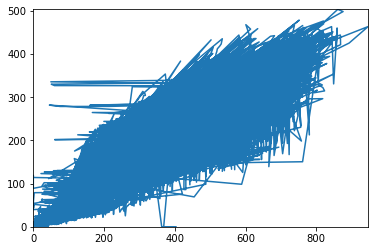

In [7]:
X = df["solar_radiation"]
Y = df["Power"]
plt.plot(X, Y)
plt.axis([X.min(), X.max(), Y.min(), Y.max()]);

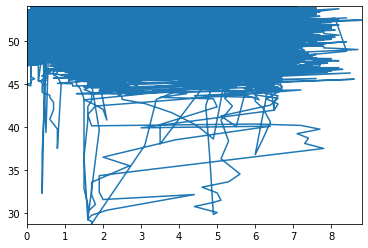

In [8]:
X = df["pv_current"]
Y = df["battery_voltage"]
plt.plot(X, Y)
plt.axis([X.min(), X.max(), Y.min(), Y.max()]);

R2 score: 0.9352440674726078


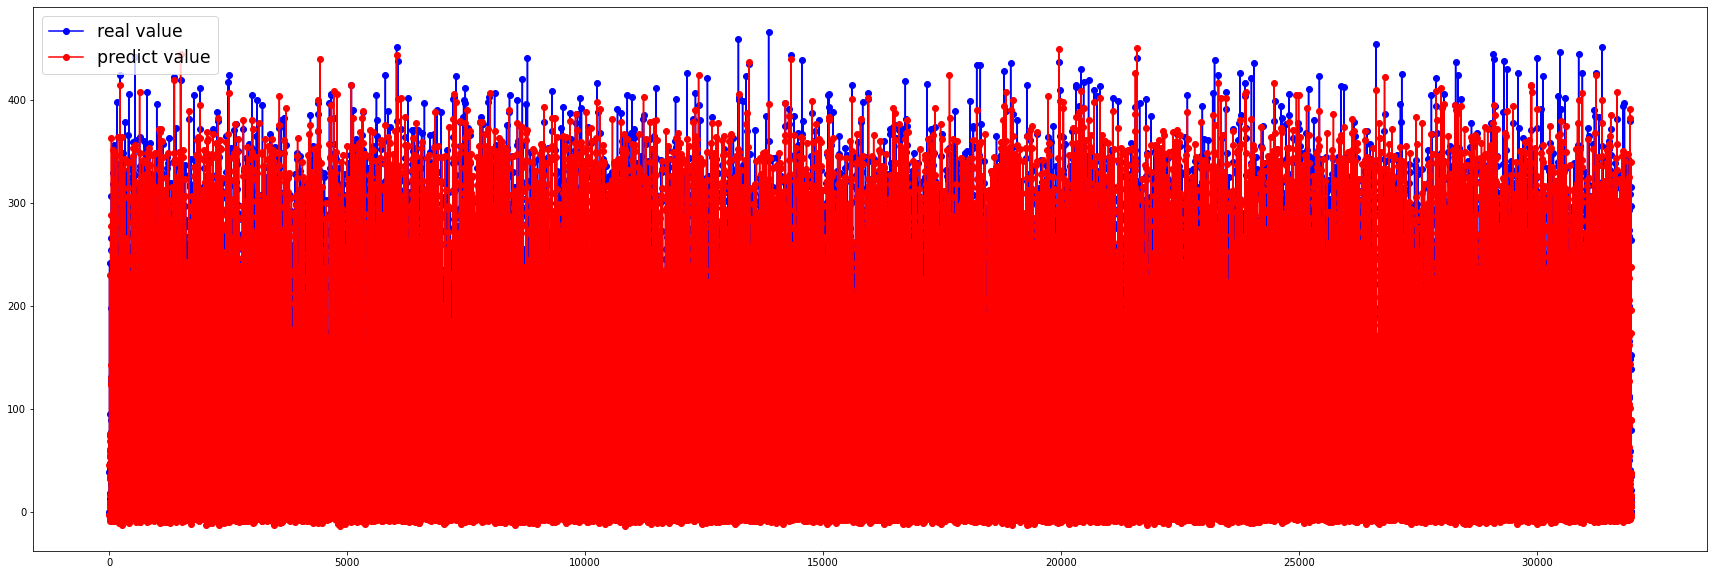

In [9]:
#fig = plt.Figure()
#fig.add_trace(plt.Scatter(x=df['uvi'], y=df['Power'], marker_color=df['temperature'], mode='markers', name='Energy [W]'))
#fig.add_trace(go.Scatter(x=df['uvi'], y=111.12345381*df['uvi'] + 4.55732642* df['temperature']- 63.5660645483966, mode='markers', name='Energy [W]'))
#fig.show()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
weather_features = ['solar_radiation', 'temperature', 'wind_speed','humidity']

# Set the variable X to be all our input columns
X = df[weather_features]

# set y to be our output column
Y = df.Power

# test_size default  0.25

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()
# fit model
mlr_model.fit(X_train, Y_train)
# predict the result
Y_pred = mlr_model.predict(X_test)

# print R2 score 
print ("R2 score: " + str(mlr_model.score(X_test, Y_test)))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_test)), Y_test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()

R2 score: 0.9356841485827864


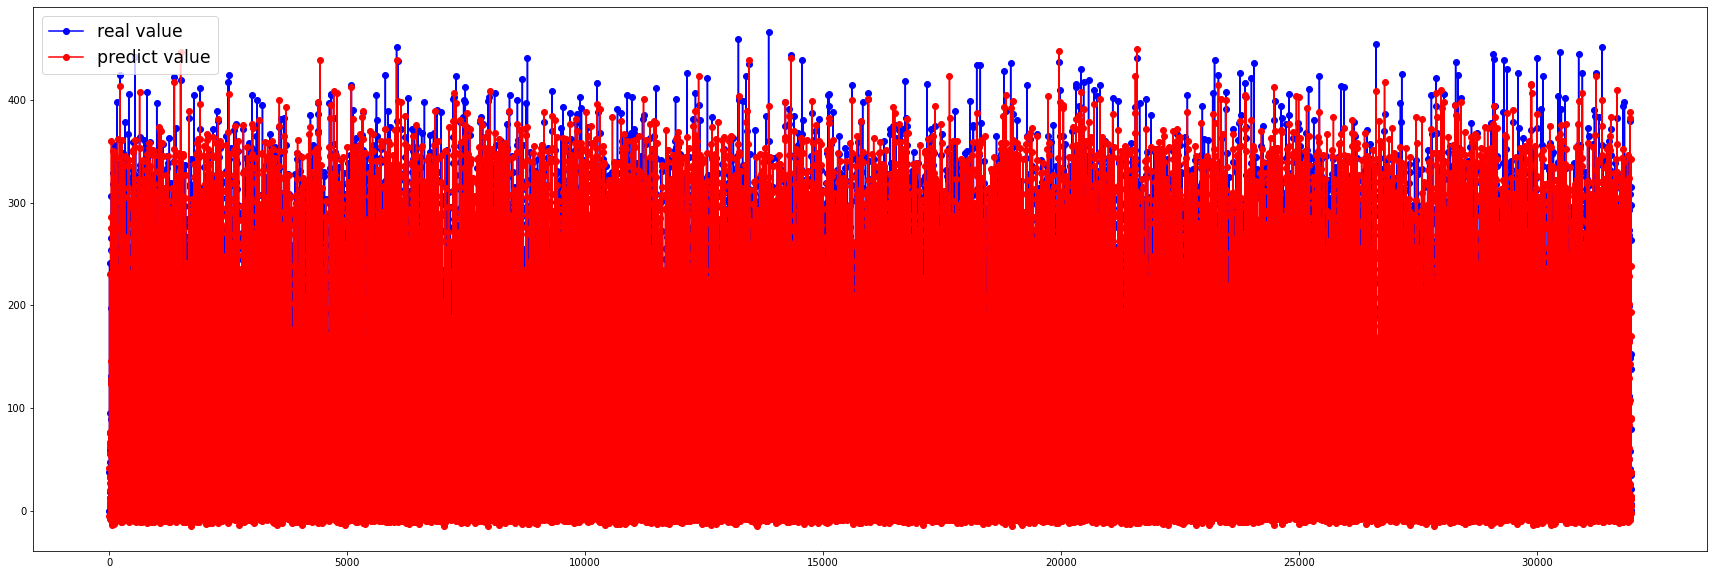

In [10]:
#fig = plt.Figure()
#fig.add_trace(plt.Scatter(x=df['uvi'], y=df['Power'], marker_color=df['temperature'], mode='markers', name='Energy [W]'))
#fig.add_trace(go.Scatter(x=df['uvi'], y=111.12345381*df['uvi'] + 4.55732642* df['temperature']- 63.5660645483966, mode='markers', name='Energy [W]'))
#fig.show()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
weather_features = ['solar_radiation', 'temperature', 'wind_speed', 'wind_dir', 'humidity', 'air_pressure']

# Set the variable X to be all our input columns
X = df[weather_features]

# set y to be our output column
Y = df.Power

# test_size default  0.25

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()
# fit model
mlr_model.fit(X_train, Y_train)
# predict the result
Y_pred = mlr_model.predict(X_test)

# print R2 score 
print ("R2 score: " + str(mlr_model.score(X_test, Y_test)))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_test)), Y_test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()